In [3]:
import nibabel as nib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm

In [4]:
data_path = '/home/gabriel/Documentos/UFMG/Mestrado/Datasets/ATLAS_2'

metadata = pd.read_excel(os.path.join(data_path, '20220425_ATLAS_2.0_MetaData.xlsx'))
metadata.head(10)

,Subject ID,Session,Organism,Organism Part,Developmental Stage,# Lesions LH Cortical and White Matter,# Lesions LH Subcortical,# Lesions RH Cortical and White Matter,# Lesions RH Subcortical,# Lesions Other Location,...,Secondary Stroke Location,Scanner Strength,Scanner Brand,Image Resolution,ATLAS 1.2,ATLAS 1.2 Subject ID,INDI Subject ID,Lesion Volume,Days Post Stroke,Chronicity
0,sub-r001s001,ses-1,Homo sapiens,Brain,Adult,0,1,1,2,0,...,"Temporal Lobe, Putamen",3T,GE Signa Excite,1.0 x 1.0 x 1.0 mm,1,c0004s0001t01,31823.0,104884.0,471.0,NaN
1,sub-r001s002,ses-1,Homo sapiens,Brain,Adult,0,1,1,0,0,...,"Temporal Lobe, Putamen",3T,GE Signa Excite,1.0 x 1.0 x 1.0 mm,1,c0004s0002t01,31824.0,125144.0,669.0,NaN
2,sub-r001s003,ses-1,Homo sapiens,Brain,Adult,0,1,0,1,0,...,Frontal Lobe,3T,GE Signa Excite,1.0 x 1.0 x 1.0 mm,1,c0004s0003t01,31825.0,1296.0,709.0,NaN
3,sub-r001s004,ses-1,Homo sapiens,Brain,Adult,1,0,0,0,1,...,Cerebellum,3T,GE Signa Excite,1.0 x 1.0 x 1.0 mm,1,c0004s0004t01,31826.0,43135.0,871.0,NaN
4,sub-r001s005,ses-1,Homo sapiens,Brain,Adult,0,1,0,0,0,...,NaN,3T,GE Signa Excite,1.0 x 1.0 x 1.0 mm,1,c0004s0005t01,31827.0,21665.0,1917.0,NaN
5,sub-r001s006,ses-1,Homo sapiens,Brain,Adult,0,1,0,2,1,...,"Brainstem/Pons, Basal Ganglia, Caudate",3T,GE Signa Excite,1.0 x 1.0 x 1.0 mm,1,c0004s0006t01,31828.0,2150.0,2587.0,NaN
6,sub-r001s007,ses-1,Homo sapiens,Brain,Adult,0,0,0,2,0,...,NaN,3T,GE Signa Excite,1.0 x 1.0 x 1.0 mm,1,c0004s0007t01,31829.0,3859.0,722.0,NaN
7,sub-r001s008,ses-1,Homo sapiens,Brain,Adult,0,1,0,1,2,...,Brainstem/Pons,3T,GE Signa Excite,1.0 x 1.0 x 1.0 mm,1,c0004s0008t01,31830.0,1320.0,2514.0,NaN
8,sub-r001s009,ses-1,Homo sapiens,Brain,Adult,0,0,1,3,0,...,"Parietal Lobe, Occipital Lobe",3T,GE Signa Excite,1.0 x 1.0 x 1.0 mm,1,c0004s0009t01,31831.0,8183.0,263.0,NaN
9,sub-r001s010,ses-1,Homo sapiens,Brain,Adult,0,0,1,0,0,...,NaN,3T,GE Signa Excite,1.0 x 1.0 x 1.0 mm,1,c0004s0010t01,31832.0,100129.0,208.0,NaN


In [5]:
train_data_path = os.path.join(data_path, 'Training')
train_files = []
train_files_labels = []

for root, _, files in os.walk(train_data_path):
    for file in files:
        if file.endswith('.nii.gz'):
            if 'label' not in file:
                train_files.append(os.path.join(root, file))
            else:
                train_files_labels.append(os.path.join(root, file))

train_files = sorted(train_files)
train_files_labels = sorted(train_files_labels)

print('Número de exemplos de treino:', len(train_files))

Número de exemplos de treino: 655


In [6]:
test_data_path = os.path.join(data_path, 'Testing')
test_files = []

for root, _, files in os.walk(test_data_path):
    for file in files:
        if file.endswith('.nii.gz'):
            test_files.append(os.path.join(root, file))

print('Número de exemplos de teste:', len(test_files))

Número de exemplos de teste: 300


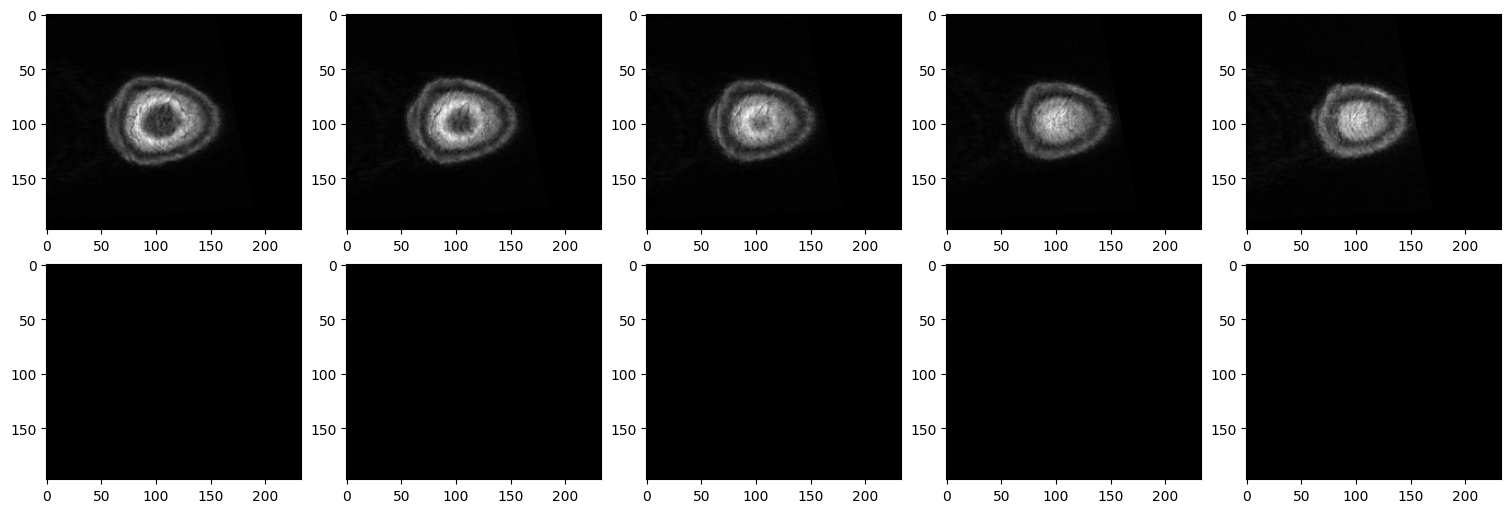

In [7]:
index = 100

example_file = train_files[index]
example_file_label = train_files_labels[index]

nii_img = nib.load(example_file)
nii_data = nii_img.get_fdata()

nii_img_label = nib.load(example_file_label)
nii_data_label = nii_img_label.get_fdata()

slice_idx = 100
fig, ax = plt.subplots(2, 5, constrained_layout=True, figsize=(15, 5))

for slice in range(5):
    ax[0, slice].imshow(nii_data[:, :, slice_idx+slice], cmap='gray', interpolation=None)
    ax[1, slice].imshow(nii_data_label[:, :, slice_idx+slice], cmap='gray', interpolation=None)

plt.show()

In [9]:
# shape = (197, 233, 189)
# new_shape = (192, 224, 176)
total_count = np.zeros(2)

for file in tqdm(train_files_labels):
    nii_img = nib.load(file)
    nii_data = nii_img.get_fdata()
    
    _, counts = np.unique(nii_data, return_counts=True)
    total_count += counts
    
total_n_values = np.sum(total_count)
print(total_n_values/(2*total_count))

  0%|          | 0/655 [00:00<?, ?it/s]

[  0.50192237 130.54794746]
